# Test over 500 repetitions

In [29]:
import numpy as np
import math
#import sys
from matplotlib import pyplot as plt


def replaceZeroes(data):
  min_nonzero = np.min(data[np.nonzero(data)])
  data[data == 0] = min_nonzero
  return data

All files "1stevent.$num$.txt" are lists of the type:

...

$<num particle>$  $<time>$

...

of the 1st event for each particle

In [30]:
#tmp, d,e = sys.argv
d, e = "80", "500"
N=484

ev=[]
rep=500
k=math.ceil(2*rep**(1/3)) #number of bins for these repetitons

events=np.zeros([rep, N])
num=np.arange(0,rep)
for i in num:
    name="EV."+d+"."+e+"/1stevlist."+str(i)+".txt"
    n=0
    with open(name, "r") as file:
        N=int(file.readline()[1:])
        for line in file:
            ev=[float(x) for x in line.split(" ")]
            events[i][n]=ev[1]
            n+=1

I chose the number of bins to be $\left|2\cdot (repetitions)^{1/3}\right|$

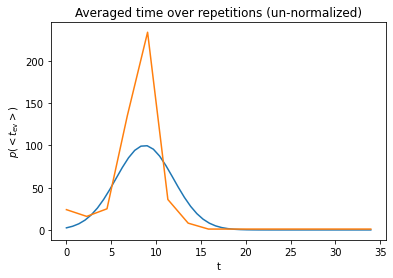

Mean: 8.73, Variance: 10.28


In [32]:
S = np.mean(events, axis=0)
H = np.histogram(S, bins=k)
μ, σ2 = np.mean(S), np.var(S)
#plt.yscale("log")

X,Y=np.linspace(0, H[1][-1], H[0].size),replaceZeroes(H[0])
x=np.linspace(0,H[1][-1])

plt.title("Averaged time over repetitions (un-normalized)")
#plt.yscale("log")
plt.plot(x, 100*np.exp(-(x-μ)**2/(2*σ2)))
plt.plot(X, Y)
plt.ylabel("$p(<t_{\mathrm{ev}}>)$")
plt.xlabel("t")
plt.show()

print("Mean: %.2f, Variance: %.2f" % (μ, σ2))

In [33]:
254.4**2

64719.36

In [34]:
wname="../t_ev."+str(d)+"."+str(e)+".txt"
with open(wname, "w") as file:
    file.write(str(μ)+"\n"+str(np.sqrt(σ2))+"\n & \n")
    for i in range(N):
        file.write(str(S[i])+"\n")


## 1) Single particles: $t_{\mathrm{ev}}^{p(i)}$

In [35]:
def expfit(p, log=True):
    H=np.histogram(events[:,p], bins=k, density=True)
    X=np.linspace(0, H[1][-1], H[0].size)
    Y=replaceZeroes(H[0])
    A=np.mean(events[:,p])
    #a,b=np.polyfit(X, np.log(Y),1)
    if log==True:
        plt.yscale("log")    
    plt.title("Particle {}".format(p+1))
    plt.plot(X, Y)
    plt.plot(X, 1/A*np.exp(-X/A))
    #Z=(np.ones(X.size)+a*X)*np.exp(b)
    plt.xlabel("$t$")
    plt.show()
    print("Typical breaking time: %.3f" % (A))
    

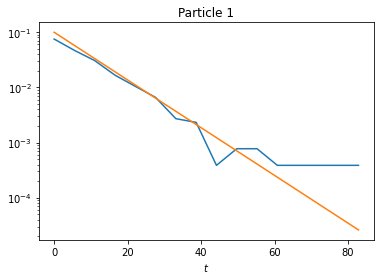

Typical breaking time: 10.046


In [36]:
expfit(0)

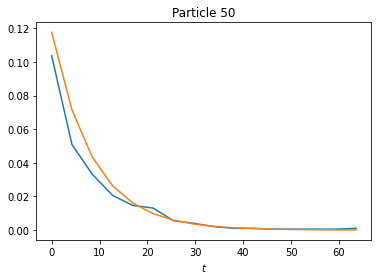

Typical breaking time: 8.498


In [37]:
expfit(49, log=False)

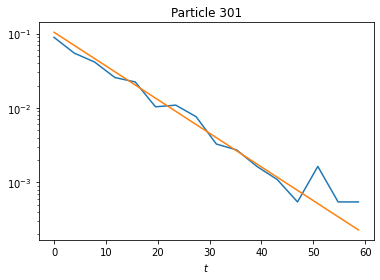

Typical breaking time: 9.595


In [38]:
expfit(300)